# **DESAFIO DE CLASSIFICAÇÃO**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

Link para o dataset: https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view

In [10]:
df = pd.read_csv('fraud_detection_dataset.csv')

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.shape

(6362620, 11)

## Tratamento de dados

In [13]:
# Renomeando as colunas

df.rename(columns={'step': 'Passo', 
                    'type': 'Tipo',
                    'amount': 'Quantia',
                    'nameOrig': 'ClienteOrigem',
                    'oldbalanceOrg': 'SaldoInicialOrigem',
                    'newbalanceOrig': 'SaldoFinalOrigem',
                    'nameDest': 'ClienteDestino',
                    'oldbalanceDest': 'SaldoInicialDestino',
                    'newbalanceDest': 'SaldoFinalDestino',
                    'isFraud': 'ÉFraude',
                    'isFlaggedFraud': 'SinalizadaComoFraude'}, inplace = True)

In [14]:
# Renomeando os valores da coluna 'Tipo'

df['Tipo'] = df['Tipo'].str.replace('PAYMENT', 'Pagamento')
df['Tipo'] = df['Tipo'].str.replace('TRANSFER', 'Transferência')
df['Tipo'] = df['Tipo'].str.replace('DEBIT', 'Débito')
df['Tipo'] = df['Tipo'].str.replace('CASH_IN', 'Depósito')
df['Tipo'] = df['Tipo'].str.replace('CASH_OUT', 'Saque')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Passo                 int64  
 1   Tipo                  object 
 2   Quantia               float64
 3   ClienteOrigem         object 
 4   SaldoInicialOrigem    float64
 5   SaldoFinalOrigem      float64
 6   ClienteDestino        object 
 7   SaldoInicialDestino   float64
 8   SaldoFinalDestino     float64
 9   ÉFraude               int64  
 10  SinalizadaComoFraude  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## EDA e Feature Engineering

In [16]:
# Criando variáveis de diferença de valores na origem e no destino

df['DiferencaOrigem'] = df['SaldoInicialOrigem'] - df['SaldoFinalOrigem']
df['DiferencaDestino'] = df['SaldoFinalDestino'] - df['SaldoInicialDestino']

Será utilizada uma amostragem com 100.000 dados a fim de otimizar o tempo de análise e modelagem

In [17]:
df_amostra = df.sample(n = 100000)

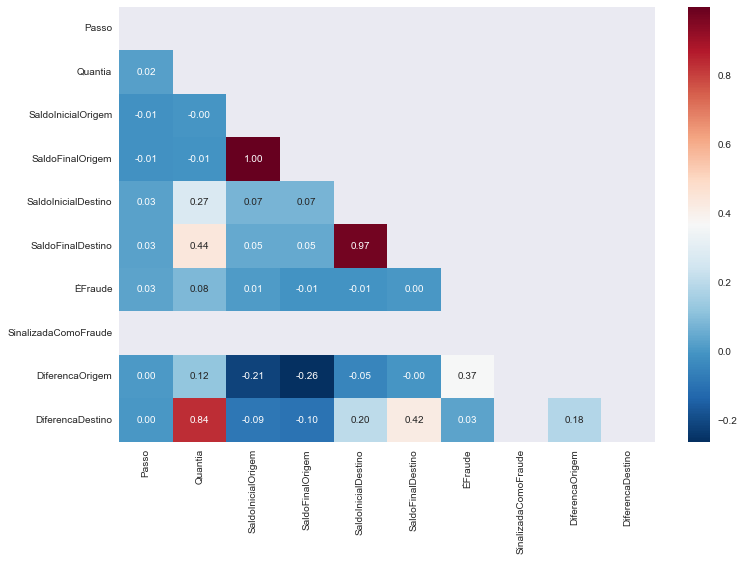

In [18]:
# Correlação das features

sns.set_context(font_scale=2.0)
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df_amostra.corr()))
sns.heatmap(df_amostra.corr(), annot=True, fmt='.2f', cmap='RdBu_r', mask=mask)
plt.show()

In [19]:
df_amostra.describe(percentiles = [.01, .05, .25, .5, .75, .95, .99], include = 'all')

,Passo,Tipo,Quantia,ClienteOrigem,SaldoInicialOrigem,SaldoFinalOrigem,ClienteDestino,SaldoInicialDestino,SaldoFinalDestino,ÉFraude,SinalizadaComoFraude,DiferencaOrigem,DiferencaDestino
count,100000.00000,100000,1.000000e+05,100000,1.000000e+05,1.000000e+05,100000,1.000000e+05,1.000000e+05,100000.000000,100000.0,1.000000e+05,1.000000e+05
unique,NaN,5,NaN,99999,NaN,NaN,92902,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Saque,NaN,C584029483,NaN,NaN,C1065997164,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,35368,NaN,2,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,244.11591,NaN,1.788785e+05,NaN,8.447142e+05,8.655372e+05,NaN,1.094320e+06,1.218048e+06,0.001330,0.0,-2.082303e+04,1.237285e+05
std,142.93178,NaN,5.719514e+05,NaN,2.922366e+06,2.958271e+06,NaN,3.226339e+06,3.476023e+06,0.036445,0.0,1.508762e+05,7.919717e+05
min,1.00000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,-1.588281e+06,-1.838137e+06
1%,9.00000,NaN,4.392664e+02,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,-4.202903e+05,-4.037000e+05
5%,16.00000,NaN,2.259747e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,-2.508874e+05,-2.215645e+05
25%,156.00000,NaN,1.361857e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00


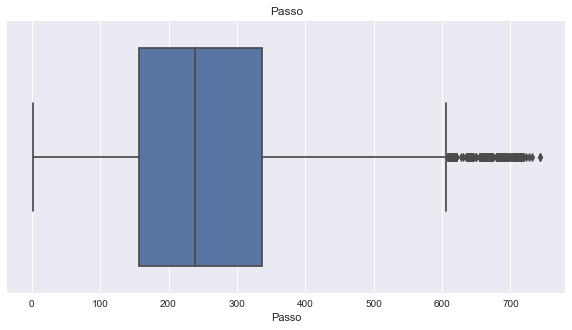

In [20]:
# Passo

plt.figure(figsize=(10,5))
sns.boxplot(data = df_amostra, x = 'Passo').set_title('Passo');

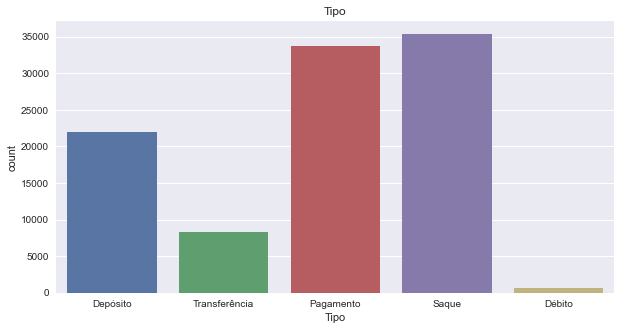

In [21]:
# Tipo

plt.figure(figsize=(10,5))
sns.countplot(data = df_amostra, x = 'Tipo').set_title('Tipo');

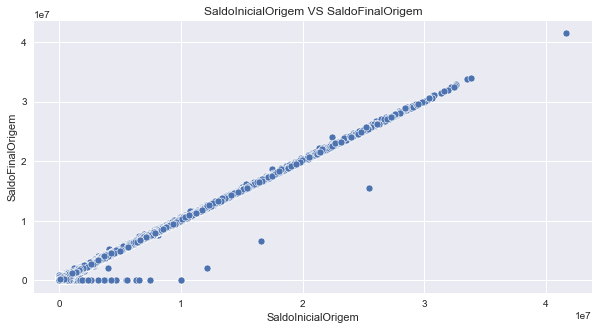

In [22]:
# SaldoInicialOrigem VS SaldoFinalOrigem

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_amostra, x = 'SaldoInicialOrigem', y = 'SaldoFinalOrigem').set_title('SaldoInicialOrigem VS SaldoFinalOrigem');

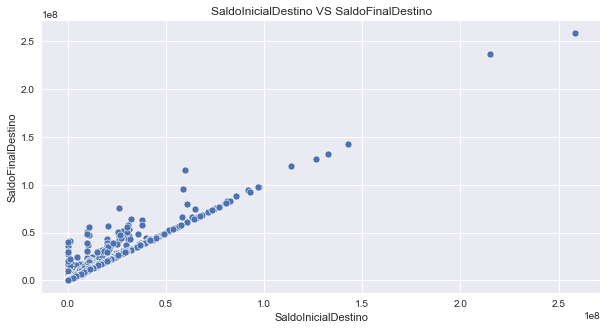

In [23]:
# SaldoInicialDestino VS SaldoFinalDestino

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_amostra, x = 'SaldoInicialDestino', y = 'SaldoFinalDestino').set_title('SaldoInicialDestino VS SaldoFinalDestino');

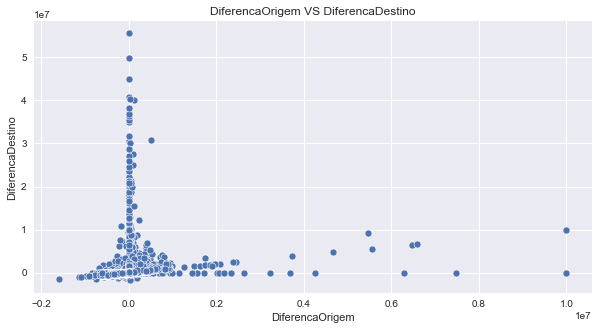

In [24]:
# DiferencaOrigem VS DiferencaDestino

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_amostra, x = 'DiferencaOrigem', y = 'DiferencaDestino').set_title('DiferencaOrigem VS DiferencaDestino');

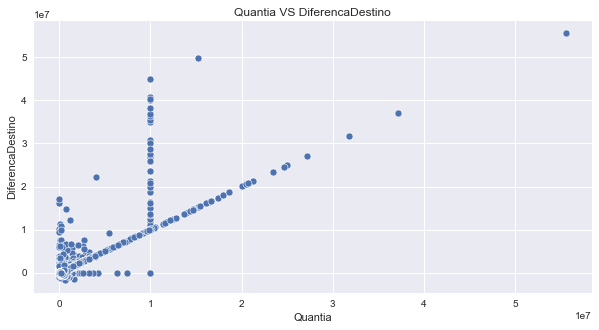

In [25]:
# Quantia VS DiferencaDestino

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_amostra, x = 'Quantia', y = 'DiferencaDestino').set_title('Quantia VS DiferencaDestino');

## Modelagem

Existem variáveis que são categóricas e para utilizá-las na modelagem, é necessário transformá-las:

In [26]:
cat_columns = []

for c in df.columns:
    if df_amostra[c].dtype == 'object': 
        cat_columns.append(c)

In [27]:
cat_columns

['Tipo', 'ClienteOrigem', 'ClienteDestino']

In [28]:
# Transformando as variáveis categóricas com o LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_amostra['Tipo'] = encoder.fit_transform(df_amostra['Tipo'])
df_amostra['ClienteOrigem'] = encoder.fit_transform(df_amostra['ClienteOrigem'])
df_amostra['ClienteDestino'] = encoder.fit_transform(df_amostra['ClienteDestino'])

In [29]:
df_amostra.columns

Index(['Passo', 'Tipo', 'Quantia', 'ClienteOrigem', 'SaldoInicialOrigem',
       'SaldoFinalOrigem', 'ClienteDestino', 'SaldoInicialDestino',
       'SaldoFinalDestino', 'ÉFraude', 'SinalizadaComoFraude',
       'DiferencaOrigem', 'DiferencaDestino'],
      dtype='object')

In [30]:
X = df_amostra.copy()
X.drop(columns = ['ÉFraude', 'SinalizadaComoFraude'], inplace = True)

In [31]:
y = df_amostra['ÉFraude']

Removendo as variáveis que são altamente correlacionadas entre si para não enviesar o modelo

<AxesSubplot:>

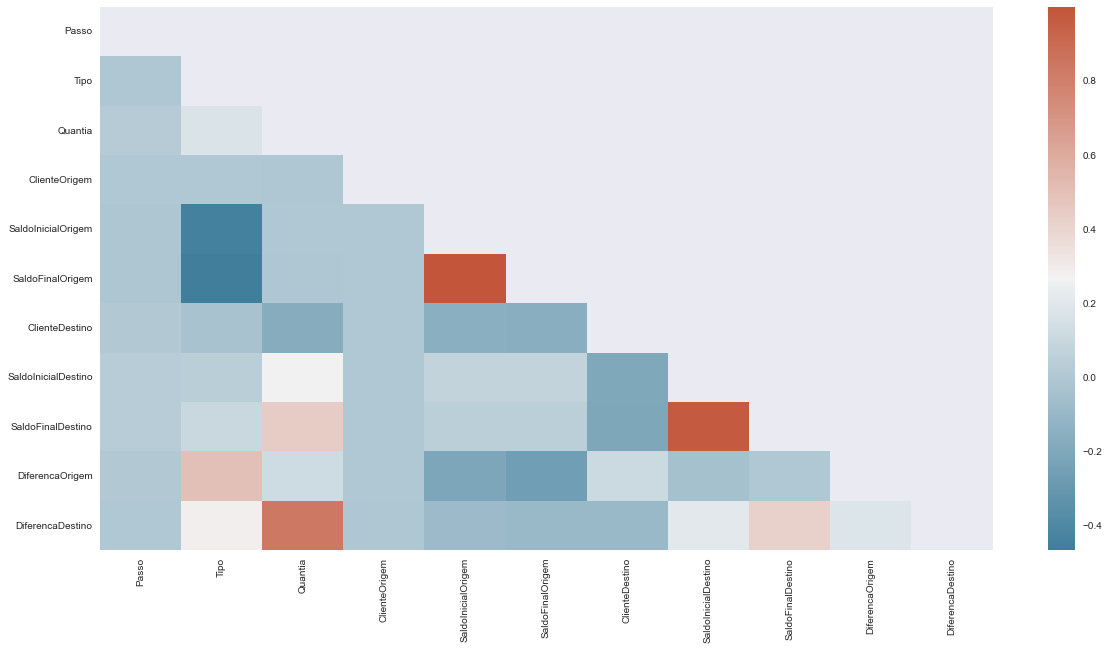

In [32]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(20, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [33]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Quantia - DiferencaDestino
SaldoInicialOrigem - SaldoFinalOrigem
SaldoInicialDestino - SaldoFinalDestino
{'Quantia', 'SaldoInicialOrigem', 'SaldoInicialDestino'}


In [34]:
X_novo = X.drop(labels = correlated_features, axis = 1)

In [35]:
# Observando o target

y.value_counts()

0    99867
1      133
Name: ÉFraude, dtype: int64

É possível observar que há poucos dados de fraude. Portanto, será utilizado do oversampling a fim de balancear os dados

In [36]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separando em treino e teste 

X_train, X_test, y_train, y_test = train_test_split(X_novo, y , test_size = .2, random_state = 42)

In [37]:
data = pd.concat([X_train,y_train],axis=1)

nao_fraude = data[data.ÉFraude == 0]
fraude = data[data.ÉFraude == 1]

# Upsampled da minoria
fraude_upsampled = resample(fraude, replace = True, n_samples = len(nao_fraude), random_state = 13)

# Combinando a maioria com a upsampled minoria
upsampled = pd.concat([nao_fraude, fraude_upsampled])

# Checando
upsampled.ÉFraude.value_counts()

0    79893
1    79893
Name: ÉFraude, dtype: int64

In [38]:
# Separando as features do target

X_train = upsampled.drop('ÉFraude', axis = 1)
y_train = upsampled['ÉFraude']

In [39]:
X_train.shape, X_test.shape

((159786, 8), (20000, 8))

In [40]:
# Importando o StandardScaler para normalizar os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_amostra = pd.DataFrame(scaler.fit_transform(df_amostra), columns = df_amostra.columns)

## Treinando o modelo

Foram escolhidos 3 modelos a fim de observar sua performances, sendo eles:

- Random Forest
- Decision Tree
- XGBoost

Como o Random Forest é um modelo muito demorado, será visto principalmente o tempo que ele leva

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_curve

#### **Treino com Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Testando em um modelo baseline

rcf = RandomForestClassifier(random_state = 42)
rcf.fit(X_train, y_train)
y_pred = rcf.predict(X_test)
y_pred_proba = rcf.predict_proba(X_test)

# Métricas de avaliação
AC = accuracy_score(y_test, y_pred)
PR = precision_score(y_test, y_pred)
RE = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

metricas = pd.DataFrame.from_dict({'Modelo': 'Baseline', 'Acurária': [AC], 'Precisão': [PR], 'Recall': [RE], 'F1': [F1], 'AUC': auc(fpr, tpr)})

print('Resultado das métricas:\n')
print('Acurácia: ' + str(AC))
print('Precisão: ' + str(PR))
print('Recall: ' + str(RE))
print('F1: ' + str(F1))
print('AUC: ' + str(auc(fpr, tpr)))

%time

Resultado das métricas:

Acurácia: 0.9995
Precisão: 0.9444444444444444
Recall: 0.6538461538461539
F1: 0.7727272727272727
AUC: 0.9606286249046838
CPU times: total: 0 ns
Wall time: 0 ns


A fim de otimizar os resultados, serão realizados testes com diferentes valores nos hiperparâmetros, sendo estes:

- **n_estimators**: número de árvores de decisão utilizadas
- **max_features**: número de features que o modelo considera quando procura pela melhor divisão do dataset
- **min_samples_leaf**: número mínimo de amostras em cada nó da árvore 

O critério adotado será a escolha do modelo com o melhor valor de F1

In [44]:
# Alterando a quantidade de n_estimators

n_est = [150, 200, 250, 300, 350]

for n in n_est:
  rcf = RandomForestClassifier(random_state = 42, n_estimators = n)
  rcf.fit(X_train, y_train)
  y_pred = rcf.predict(X_test)
  y_pred_proba = rcf.predict_proba(X_test)
  
  AC = accuracy_score(y_test, y_pred)
  PR = precision_score(y_test, y_pred)
  RE = recall_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

  metricas = metricas.append({'Modelo': 'n_estimators = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)

print(metricas)
%time

C:\Users\aline\AppData\Local\Temp\ipykernel_25200\581324467.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'n_estimators = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\581324467.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'n_estimators = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\581324467.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'n_estimators = ' + str(n), 

               Modelo  Acurária  Precisão    Recall        F1       AUC
0            Baseline   0.99950  0.944444  0.653846  0.772727  0.960629
1  n_estimators = 150   0.99950  0.944444  0.653846  0.772727  0.979516
2  n_estimators = 200   0.99950  0.944444  0.653846  0.772727  0.979329
3  n_estimators = 250   0.99945  0.941176  0.615385  0.744186  0.979593
4  n_estimators = 300   0.99945  0.941176  0.615385  0.744186  0.979476
5  n_estimators = 350   0.99945  0.941176  0.615385  0.744186  0.979545
CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\aline\AppData\Local\Temp\ipykernel_25200\581324467.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'n_estimators = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)


Pelo teste realizado, o melhor valor de n_estimators é o de 200, portanto, será utilizado ele

In [45]:
# Alterando a quantidade de max_features

max_features = ['sqrt', 0.1, 0.2, 0.3, 0.4]

for n in max_features:
  rcf = RandomForestClassifier(random_state = 42, n_estimators = 200, max_features = n)
  rcf.fit(X_train, y_train)
  y_pred = rcf.predict(X_test)
  y_pred_proba = rcf.predict_proba(X_test)
    
  AC = accuracy_score(y_test, y_pred)
  PR = precision_score(y_test, y_pred)
  RE = recall_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

  metricas = metricas.append({'Modelo': 'max_features = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)

print(metricas)
%time

C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2117797205.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'max_features = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2117797205.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'max_features = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2117797205.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'max_features = ' + str(n

                 Modelo  Acurária  Precisão    Recall        F1       AUC
0              Baseline   0.99950  0.944444  0.653846  0.772727  0.960629
1    n_estimators = 150   0.99950  0.944444  0.653846  0.772727  0.979516
2    n_estimators = 200   0.99950  0.944444  0.653846  0.772727  0.979329
3    n_estimators = 250   0.99945  0.941176  0.615385  0.744186  0.979593
4    n_estimators = 300   0.99945  0.941176  0.615385  0.744186  0.979476
5    n_estimators = 350   0.99945  0.941176  0.615385  0.744186  0.979545
6   max_features = sqrt   0.99950  0.944444  0.653846  0.772727  0.979329
7    max_features = 0.1   0.99940  1.000000  0.538462  0.700000  0.979017
8    max_features = 0.2   0.99940  1.000000  0.538462  0.700000  0.979017
9    max_features = 0.3   0.99950  0.944444  0.653846  0.772727  0.979329
10   max_features = 0.4   0.99945  0.941176  0.615385  0.744186  0.998805
CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2117797205.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'max_features = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)


O valor padrão sqrt se mostrou com o melhor resultado de max_features. Os testes seguirão com este valor

In [46]:
# Alterando o min_samples_leaf

min_samples_leaf = list(range(1, 10))

for n in min_samples_leaf:
  rcf = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', min_samples_leaf = n)
  rcf.fit(X_train, y_train)
  y_pred = rcf.predict(X_test)
  y_pred_proba = rcf.predict_proba(X_test)
    
  AC = accuracy_score(y_test, y_pred)
  PR = precision_score(y_test, y_pred)
  RE = recall_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

  metricas = metricas.append({'Modelo': 'min_samples_leaf = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)

print(metricas)
%time

C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2547027668.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'min_samples_leaf = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2547027668.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'min_samples_leaf = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)
C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2547027668.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'min_samples_leaf

                  Modelo  Acurária  Precisão    Recall        F1       AUC
0               Baseline   0.99950  0.944444  0.653846  0.772727  0.960629
1     n_estimators = 150   0.99950  0.944444  0.653846  0.772727  0.979516
2     n_estimators = 200   0.99950  0.944444  0.653846  0.772727  0.979329
3     n_estimators = 250   0.99945  0.941176  0.615385  0.744186  0.979593
4     n_estimators = 300   0.99945  0.941176  0.615385  0.744186  0.979476
5     n_estimators = 350   0.99945  0.941176  0.615385  0.744186  0.979545
6    max_features = sqrt   0.99950  0.944444  0.653846  0.772727  0.979329
7     max_features = 0.1   0.99940  1.000000  0.538462  0.700000  0.979017
8     max_features = 0.2   0.99940  1.000000  0.538462  0.700000  0.979017
9     max_features = 0.3   0.99950  0.944444  0.653846  0.772727  0.979329
10    max_features = 0.4   0.99945  0.941176  0.615385  0.744186  0.998805
11  min_samples_leaf = 1   0.99950  0.944444  0.653846  0.772727  0.979773
12  min_samples_leaf = 2 

C:\Users\aline\AppData\Local\Temp\ipykernel_25200\2547027668.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append({'Modelo': 'min_samples_leaf = ' + str(n), 'Acurária': AC, 'Precisão': PR, 'Recall': RE, 'F1': F1, 'AUC': auc(fpr, tpr)}, ignore_index=True)


Observa-se que quando min_samples_leaf = 1 há um bom valor de F1

In [58]:
# Observando de maneira organizada as métricas e a matriz de confusão com os valores com melhores resultados

rcf = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', min_samples_leaf = 1)
rcf.fit(X_train, y_train)
y_pred = rcf.predict(X_test)
y_pred_proba = rcf.predict_proba(X_test)

pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["Acurácia", "Recall", "F1", "ROC-AUC Score"])

,0
Acurácia,0.999550
Recall,0.653846
F1,0.790698
ROC-AUC Score,0.826923


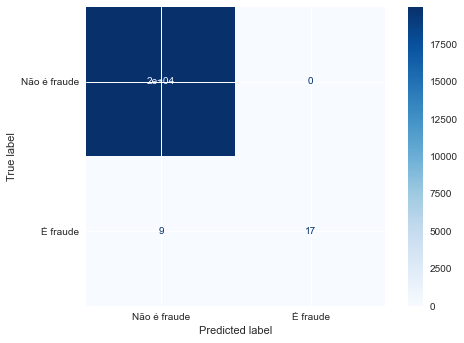

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não é fraude', 'É fraude'])
disp.plot(cmap='Blues')

Apesar de um excelente algoritmo, o Random Forest exige muito poder computacional e é demasiadamente demorado. A fim de comparação para saber se um modelo mais simples não seria suficiente, serão testados outros algoritmos

#### **Treino com Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42).fit(X_train, y_train)
threshold = 0.6
preds = np.where(dtc.predict_proba(X_test)[:,1] > threshold, 1, 0)
y_pred = dtc.predict(X_test)

pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["Acurácia", "Recall", "F1", "ROC-AUC Score"])

,0
Acurácia,0.999050
Recall,0.615385
F1,0.627451
ROC-AUC Score,0.807467


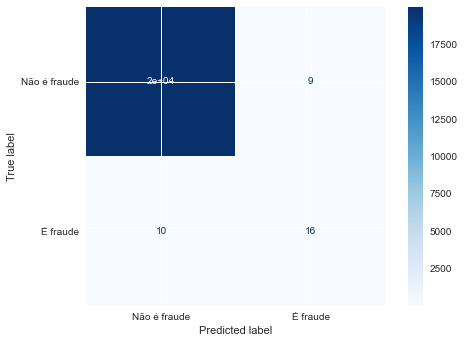

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não é fraude', 'É fraude'])
disp.plot(cmap='Blues')

#### **Treino com XGBoost**

In [52]:
import xgboost as xgb

In [53]:
gbm = xgb.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.05).fit(X_train, y_train)
predictions = gbm.predict(X_test)

pd.DataFrame(data=[accuracy_score(y_test, predictions), recall_score(y_test, predictions),
                   f1_score(y_test, predictions), roc_auc_score(y_test, predictions)], 
             index=["Acurácia", "Recall", "F1", "ROC-AUC Score"])

c:\Users\aline\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\aline\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:34:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,0
Acurácia,0.994300
Recall,0.884615
F1,0.287500
ROC-AUC Score,0.939529


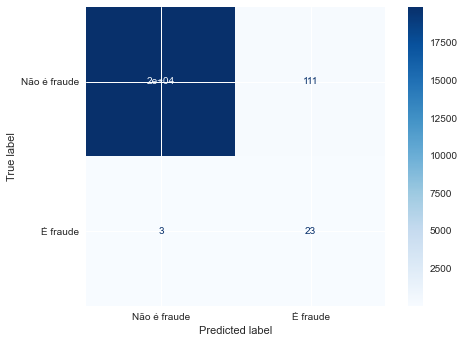

In [54]:
cnf_matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não é fraude', 'É fraude'])
disp.plot(cmap='Blues')

## Análise da solução e conclusão

Como foi possível observar, mesmo alterando o valor padrão do threshold, o valor de F1 não melhorou nos algoritmos de Decision Tree e XGBoost, sendo muito abaixo do resultado obtido com o Random Forest.

Algo interessante de se notar é que mesmo o XGBoost tendo um F1 baixo, o seu valor de falsos negativos foi o menor dos três algoritmos. Este tipo de erro é o mais grave de se cometer, entretando, o número de falsos positivos foi alto, o que acarretou em um baixo F1. Este algoritmo poderia ser escolhido já que o erro grave teve um melhor resultado, entretando, pelo alto número de FP, poderia causar um aumento no número de churns, acarretando em prejuízos para a empresa.